# Regression
### XVII Summer School in Statistics for Astronomers, Spring 2022
### Eric Feigelson   

**Concepts of regression**

Regression is one of the most common statistical operations used in astronomy.  But it applies only to specific situations:  

*   The scientific question identifies a *response variable* (often designated *y*) whose values depend on one or more *independent variables* (*x*). For example: How does the star formation rate (SFR) of Galactic molecular clouds depend on the gas mass and central density of the cloud (M<sub>g</sub>, $\rho$<sub>c</sub>)?  The variables are not treated symmetrically; entirely different answers can emerge if one asks how the central density depends on SFR.  The statistician does not choose the response variable ... the scientist chooses it.   

*   The scientific situation defines the functional form of the relation.  For example, a powerlaw relation like: SFR $\propto$ M<sub>g</sub><sup>$\alpha$</sup> $\rho$<sub>c</sub><sup>$\beta$</sup>. The regression procedure then seeks the `best' values of parameters $\alpha$ and $\beta$ for the dataset.  If the functional form does not fit the data for any values of the parameters, then the statistical model is said to be *misspecified* and the scientific meaning of the best-fit parameters is uncertain.  

*  The scientist chooses a distribution for the errors $\epsilon$ in the response variables; that is, in how the points scatter about the true model.  In almost all cases, the choice is a Gaussian (normal) distribution with zero mean and constant (homoscedastic) variance. The statistical model should thus be written:  SFR = M<sub>g</sub><sup>$\alpha$</sup> $\rho$<sub>c</sub><sup>$\beta$</sup> + $\epsilon$ where $\epsilon = N(0, \sigma^2)$.  Common regression methods also assume that the errors are uncorrelated.  

These assumptions can be tested after the best-fit model is found.  There are nonparametric tests for: goodness-of-fit to assure the model is correctly specified (Anderson-Darling test); for normality of the errors (Shapiro-Wilks test); for uncorrelated errors (Dubin-Watson and Ljung-Box tests). Graphical residual analysis is also quite useful.   Furthermore, there are likelihood-based measures (such as the Bayesian Information Criterion) to compare the specification of different models; e.g. to avoid overfitting the data.   Unfortunately, most astronomers do not apply these tools to establish the validity of their regression fit.   

**'Linear' models**

There is another common source of confusion.  In statistical parlance, 'linear' refers to a much broader range of models than the familiar straight line model $Y = \beta_0 + \beta_1 X + \epsilon$.  It includes any model that is linear in the model parameters -- not linear in the independent variables.  Thus the following models are 'linear' and are encompassed by the powerful theorems underlying linear modeling:
- $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$ (polynomial)
- $Y = \beta_0 e^{-X} + \epsilon$ (exponential)
- $Y = \beta_0 + \beta_1 sin X + \beta_2 cos X + \epsilon$ (sinusoid)

In contrast the following models are nonlinear:
- $Y = (X/\beta_0)^{-\beta_1}+ \epsilon$  (power law or Pareto)
- $Y = \beta_0 e^{-X/\beta_1} + \epsilon$ (scaled exponential)
- $Y = \beta_0 / (1 + (X/\beta_1)^2) + \epsilon$  (isothermal sphere)
- $Y = \beta_0 + \beta_1 sin(X + \beta_2) + \beta_3 cos(X + \beta_2) + \epsilon$  (sinusoid with arbitrary phase)
- $Y = [\beta_0 + \beta_1 X$ for $X < \beta_2$] and [$\beta_3 + \beta_4 X$ for $X > \beta_2$] (segmented linear or broken power law)
- Most astrophysical models like isothermal spheres and $\Lambda$CDM cosmology 


Note that the theory of linear modeling is not restricted to bivariate problems: it is intrinsically multivariate in the sense that a single response variable $Y$ can be a function of a vector of covariates $\bf{X}$ as in the simple model: $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon$.


**Starting this tutorial**

We will exercise both linear and nonlinear regression of astronomical datasets with R and its CRAN packages. We will briefly consider situations with heteroscedastic weighting by measurement errors and robust treatment of non-Gaussian errors.  We will apply simple goodness-of-fit and residual analysis to confirm that the best-fit model is indeed a good fit.  

### 1. Linear regression


We start by running one of the most widely used functions in R, _lm_ for linear modeling, and related procedures. We will practice linear modeling with a collection of photometry of spectroscopically confirmed quasars from the Sloan Digital Sky Survey.  We examine a relationship between the magnitudes in two bands.  This is scientifically rather useless, but gives opportunity to test methodology for simple linear regression with difficulties common in astronomical regressions:  non-Gaussian scatter, heteroscedastic measurement errors, and outliers.  

In [1]:
# I. Construct large and small samples of 77K SDSS quasars

install.packages('astrodatR')  # package with datasets from the MSMA textbook
library(astrodatR)
data(SDSS_QSO)     # brings tabular data into an R data.frame

# Basic information about a data.frame
dim(SDSS_QSO)      # number of rows and columns
names(SDSS_QSO)    # names of columns
summary(SDSS_QSO)  # 5-number summary of each column


The downloaded binary packages are in
	/var/folders/ly/59qzp7vx2_v_dm33xgg2knbc0000gn/T//RtmpjEk3Mz/downloaded_packages


[1] 77429    15

[1] "SDSS"      "z"         "u_mag"     "sig_u_mag" "g_mag"     "sig_g_mag"
 [7] "r_mag"     "sig_r_mag" "i_mag"     "sig_i_mag" "z_mag"     "sig_z_mag"
[13] "FIRST"     "ROSAT"     "Mp"

                 SDSS             z              u_mag         sig_u_mag      
 000006.53+003055.2:    1   Min.   :0.0780   Min.   : 0.00   Min.   :0.00000  
 000008.13+001634.6:    1   1st Qu.:0.9555   1st Qu.:19.09   1st Qu.:0.02800  
 000009.26+151754.5:    1   Median :1.4820   Median :19.58   Median :0.03700  
 000009.38+135618.4:    1   Mean   :1.5375   Mean   :19.82   Mean   :0.08947  
 000009.42-102751.9:    1   3rd Qu.:1.9303   3rd Qu.:20.30   3rd Qu.:0.05500  
 000011.41+145545.6:    1   Max.   :5.4135   Max.   :26.79   Max.   :9.99900  
 (Other)           :77423                                                     
     g_mag         sig_g_mag           r_mag         sig_r_mag      
 Min.   : 0.00   Min.   :0.00000   Min.   : 0.00   Min.   :0.00000  
 1st Qu.:18.86   1st Qu.:0.01900   1st Qu.:18.69   1st Qu.:0.01700  
 Median :19.30   Median :0.02300   Median :19.12   Median :0.02000  
 Mean   :19.35   Mean   :0.02653   Mean   :19.12   Mean   :0.02238  
 3rd Qu.:19.95   3rd Qu

In [2]:
# Remove some bad photometry

qso <- SDSS_QSO[-which(SDSS_QSO[,3] == 0 | SDSS_QSO[,9] == 0),]
qso <- qso[-which(qso[,4] == 9.999 | qso[,12] == 9.999),]
qso[(qso[,4]<0.02),4 ] <- 0.02        # set threshold on magnitude errors
dim(qso) ; summary(qso)
attach(qso)

[1] 77290    15

                 SDSS             z              u_mag         sig_u_mag      
 000006.53+003055.2:    1   Min.   :0.0780   Min.   :15.40   Min.   :0.02000  
 000008.13+001634.6:    1   1st Qu.:0.9554   1st Qu.:19.09   1st Qu.:0.02800  
 000009.26+151754.5:    1   Median :1.4820   Median :19.59   Median :0.03700  
 000009.38+135618.4:    1   Mean   :1.5374   Mean   :19.85   Mean   :0.08954  
 000009.42-102751.9:    1   3rd Qu.:1.9300   3rd Qu.:20.30   3rd Qu.:0.05500  
 000011.41+145545.6:    1   Max.   :5.4135   Max.   :26.79   Max.   :9.41500  
 (Other)           :77284                                                     
     g_mag         sig_g_mag           r_mag         sig_r_mag      
 Min.   :15.32   Min.   :0.00800   Min.   :15.24   Min.   :0.00600  
 1st Qu.:18.86   1st Qu.:0.01900   1st Qu.:18.70   1st Qu.:0.01700  
 Median :19.31   Median :0.02300   Median :19.13   Median :0.02000  
 Mean   :19.38   Mean   :0.02658   Mean   :19.16   Mean   :0.02231  
 3rd Qu.:19.95   3rd Qu

When applied to a data.frame, the R function `attach` allows the user to access a column by its names (e.g. r_mag) without remembering their column number (e.g. qso[,3]).

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



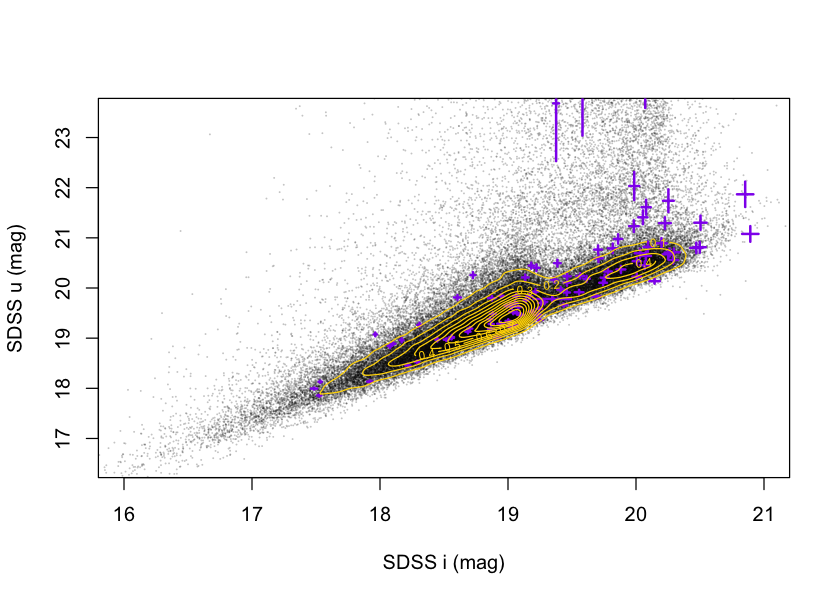

In [3]:
# Plot dataset of SDSS quasar i vs. u magnitudes showing 
# some of the heteroscedastic measurement errors, with contours for dense regions

options(jupyter.plot_scale=1)   # omit this if running on local computer
options(repr.plot.width = 7, repr.plot.height = 5)

plot(i_mag, u_mag, pch=20, cex=0.1, col='#00000040', xlim=c(16,21), 
   ylim=c(16.5,23.5), xlab="SDSS i (mag)", ylab="SDSS u (mag)")
for(i in 50:150) {
   lines(c(i_mag[i],i_mag[i]),c((u_mag[i]+sig_u_mag[i]),
      (u_mag[i]-sig_u_mag[i])), lwd=2, col='purple2')
   lines(c((i_mag[i]+sig_i_mag[i]),(i_mag[i]-sig_i_mag[i])),
      c(u_mag[i],u_mag[i]), lwd=2, col='purple2')   }

library(KernSmooth)
smqso <- bkde2D(cbind(i_mag, u_mag), bandwidth=c(0.05, 0.05), gridsize=c(400,400))
contour(smqso$x1, smqso$x2, smqso$fhat, add=T, col='gold', nlevels=9)

Here we see a disturbed dataset. There is wide asymmetrical scatter towards main magnitudes in the SDSS u (ultraviolet) band.  Much of the scatter is attributable to measurement errors, but not all of it. Let us now run _lm_ with the formula: $u = \beta_0 + \beta_1 i + \epsilon$, obtain 90% confidence interval of the intercept and slope parameters, and show the scatter plot with the fitted line. 


Call:
lm(formula = u_mag ~ i_mag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2093 -0.5097 -0.2849  0.0401  7.9862 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.784407   0.093357  -40.54   <2e-16 ***
i_mag        1.243705   0.004908  253.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.026 on 77288 degrees of freedom
Multiple R-squared:  0.4538,	Adjusted R-squared:  0.4538 
F-statistic: 6.422e+04 on 1 and 77288 DF,  p-value: < 2.2e-16


,5 %,95 %
(Intercept),-3.937967,-3.630846
i_mag,1.235632,1.251778


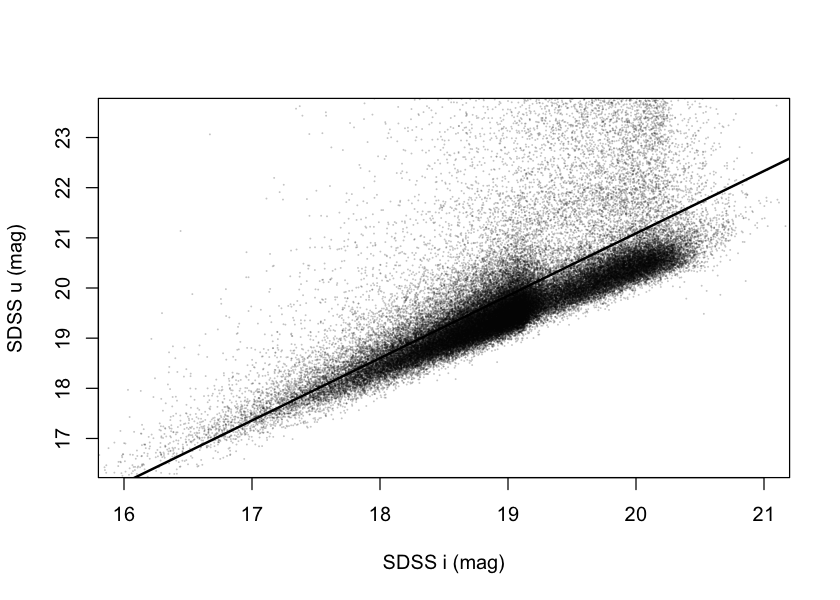

In [4]:
# II. Ordinary least squares fit

fit_ols <- lm(u_mag~i_mag)
summary(fit_ols) 
confint(fit_ols, level=0.90)          # 3 sigma equivalent for Gaussian distribution

plot(i_mag, u_mag, pch=20, cex=0.1, col='#00000040', xlim=c(16,21), 
   ylim=c(16.5,23.5), xlab="SDSS i (mag)", ylab="SDSS u (mag)")
abline(fit_ols$coef, lty=1, lwd=2)     # solid black line

Note that, since the scatter is non-Gaussian, the theorems underlying ordinary least squares means that the fit is not a maximum likelihood estimator and the parameter uncertainties may not be reliable.  Visually, this is a terrible fit, missing most of the data points.  We now try to improve it in three ways:  weighting by measurement errors; applying `robust` downweighting of outliers; and applying both corrections.  


Call:
lm(formula = u_mag ~ i_mag, weights = 1/(sig_u_mag * sig_u_mag), 
    x = T)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-48.687  -3.757   1.266   6.281 120.471 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.220633   0.028881   42.26   <2e-16 ***
i_mag       0.960787   0.001555  618.03   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.066 on 77288 degrees of freedom
Multiple R-squared:  0.8317,	Adjusted R-squared:  0.8317 
F-statistic: 3.82e+05 on 1 and 77288 DF,  p-value: < 2.2e-16


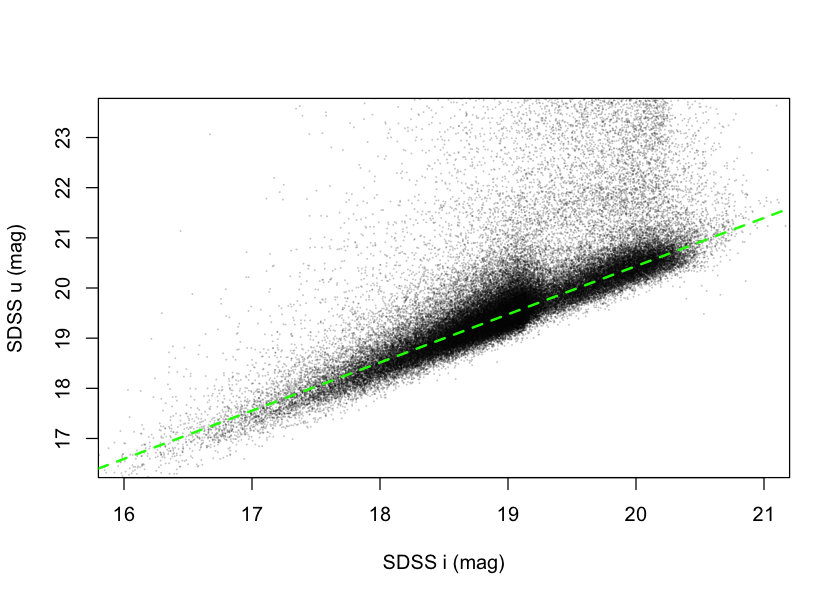

In [5]:
# III. Weighted least squares fit

fit_wt <- lm(u_mag~i_mag, x=T, weights=1/(sig_u_mag*sig_u_mag))
summary(fit_wt)

plot(i_mag, u_mag, pch=20, cex=0.1, col='#00000040', xlim=c(16,21), 
   ylim=c(16.5,23.5), xlab="SDSS i (mag)", ylab="SDSS u (mag)")
abline(fit_wt$coef,lty=2,lwd=2, col='green')    # dashed green line

This is the ***minimum chi-squared regression*** commonly used by astronomers; statisticians would call it ***weighted least squares regression with weights from heteroscedastic measurement errors***.  Here we see that most of the problems can be removed with measurement error weighting. However, the calculation is obviously wrong in this case because (in statistical parlance) the model is misspecified because only a portion of the scatter is caused by measurement error.  

Astronomers often do not carefully examine the accuracy and validity of their regression fits.  Diagnostic graphics are very useful for this.  Here are the plots produced automatically by R's `lm` function. For interpretation and details, see the text [_A Modern Approach to Regression with R_](https://link.springer.com/book/10.1007%2F978-0-387-09608-7) (S. Sheather, 2009).

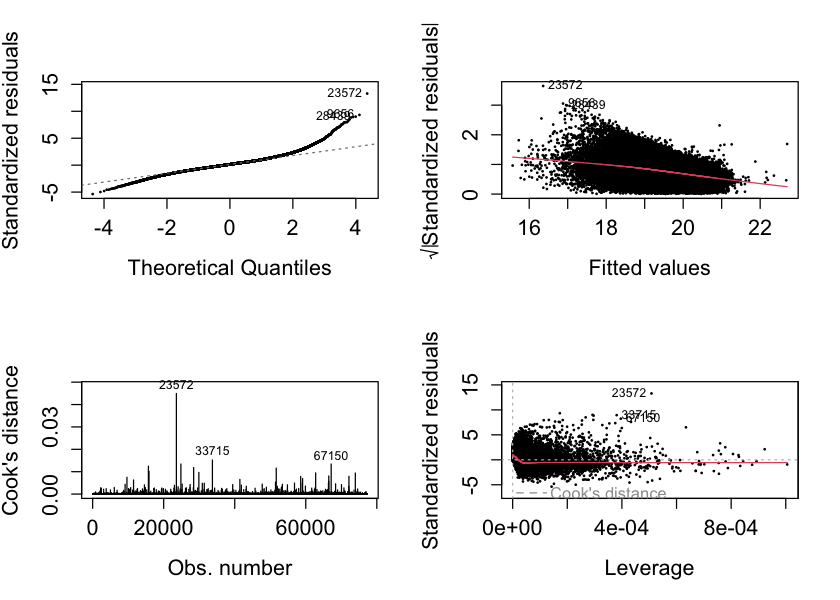

In [6]:
# Diagnostic plots involving regression residuals help identify outliers

par(mfrow=c(2,2))		
plot(fit_wt, which=c(2:5), caption='', sub.caption='' ,pch=20, cex=0.3, 
   cex.lab=1.3, cex.axis=1.3)

Other regression diagnostic tests can be applied to help evaluate the validity of the statistical model and its best-fit parameters.  The most important is a nonparametric two-sample test between the cumulative distribution functions of the observed and fitted values of the response variable. The Kolmogorov-Smirnov test is commonly used, but the Cramer-von Mises and Anderson-Darling tests are more sensitive.   However, theorems show that tabulated probabilities are inapplicable when the second distribution is from a model based on the first distribution.  We thus use bootstrap replications to estimate probabilities. This capability is provided by CRAN package 'cramer' for the Cramer-von Mises test.  To avoid excessive computational time, we only treat the first 1000 points here. The weighted linear fit is obviously rejected by the test.  


The downloaded binary packages are in
	/var/folders/ly/59qzp7vx2_v_dm33xgg2knbc0000gn/T//RtmpjEk3Mz/downloaded_packages


Loading required package: boot




 1 -dimensional  nonparametric Cramer-Test with kernel phiCramer 
(on equality of two distributions) 

	x-sample:  1000  values        y-sample:  1000  values

critical value for confidence level  95 % :  1.061035 
observed statistic  17.41952 , so that
	 hypothesis ("x is distributed as y") is  REJECTED .
estimated p-value =  0 

	[result based on  100   ordinary  bootstrap-replicates]


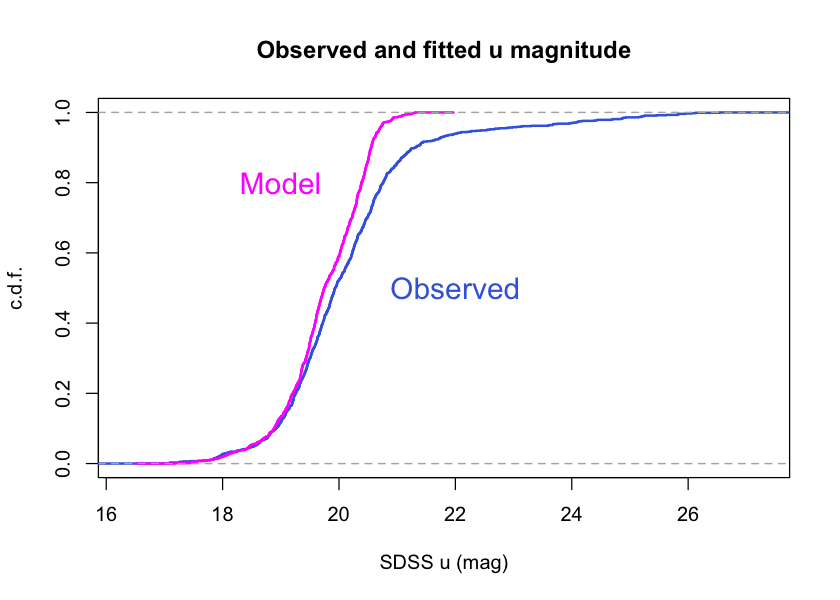

In [7]:
# Goodness-of-fit for a 2D regression

install.packages('cramer')
library(cramer)
cramer.test(fit_wt$model$u_mag[1:1000], fit_wt$fitted.values[1:1000], replicates=100)

plot(ecdf(fit_wt$model$u_mag[1:1000]), cex=0, col='royalblue', lwd=2, xlab='SDSS u (mag)', ylab='c.d.f.', main='Observed and fitted u magnitude')
plot(ecdf(fit_wt$fitted.values[1:1000]), cex=0, col='magenta', lwd=2, add=TRUE)
text(22, 0.5, 'Observed', cex=1.5, col='royalblue')
text(19, 0.8, 'Model', cex=1.5, col='magenta')

Another approach to non-Gaussianity and outliers is to apply _robust_ regression techniques.  These are many variants; here R's _rlm_ (robust linear modeling) function, downweighting outliers using Huber's psi function, with and without measurement error weighting.  Unfortunately, this code does not have a built-in line plotting option, so we draw the lines manually from information in the _rlm_ output.  See various approaches in R at the CRAN Task View on Robust Statistics.


Call: rlm(formula = u_mag ~ i_mag, method = "M")
Residuals:
     Min       1Q   Median       3Q      Max 
-2.28936 -0.23476 -0.05688  0.23543  7.97974 

Coefficients:
            Value    Std. Error t value 
(Intercept)  -0.3093   0.0338    -9.1428
i_mag         1.0471   0.0018   588.8720

Residual standard error: 0.3484 on 77288 degrees of freedom


Call: rlm(formula = u_mag ~ i_mag, weights = 1/(sig_u_mag * sig_u_mag), 
    method = "M", wt.method = "inv.var")
Residuals:
    Min      1Q  Median      3Q     Max 
-49.653  -3.507   1.409   6.469 124.019 

Coefficients:
            Value    Std. Error t value 
(Intercept)   0.7889   0.0257    30.7415
i_mag         0.9832   0.0014   711.7537

Residual standard error: 7.511 on 77288 degrees of freedom

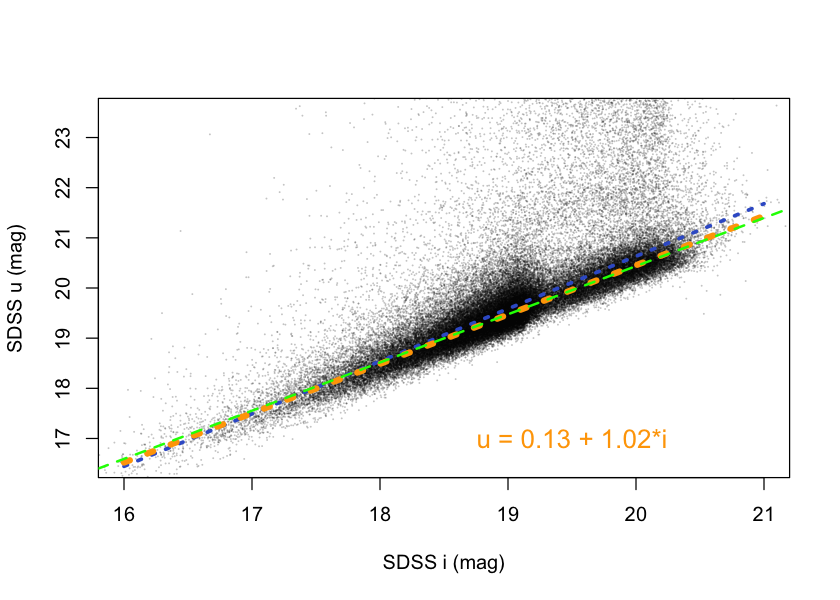

In [8]:
# Robust M-estimator

library(MASS)
fit_M <- rlm(u_mag~i_mag, method='M')	# robust fit with Huber's psi functon
summary(fit_M)  
aM <- fit_M$coef[[1]] ; bM <- fit_M$coef[[2]]

plot(i_mag, u_mag, pch=20, cex=0.1, col='#00000040', xlim=c(16,21), 
   ylim=c(16.5,23.5), xlab="SDSS i (mag)", ylab="SDSS u (mag)")
lines(c(16,21), c(aM+bM*16, aM+bM*21), lty=3, lwd=3, col='royalblue3') # dotted royal blue line

fit_Mwt <- rlm(u_mag~i_mag, method='M', weights=1/(sig_u_mag*sig_u_mag), 
   wt.method='inv.var')   # robust fit with measurement error weighting 
summary(fit_Mwt)  
aMwt <- fit_Mwt$coef[[1]] ; bMwt <- fit_Mwt$coef[[2]]

lines(c(16,21), c(aMwt+bMwt*16, aMwt+bMwt*21), lty=3, lwd=5, col='orange')
text(19.5, 17, 'u = 0.13 + 1.02*i', cex=1.3, col='orange')

abline(fit_wt$coef,lty=2,lwd=2, col='green')    # dashed green line (weighted LS fit)

Here we see that a robust regression line that downweights outliers treated most of the problem with bad u-band photometry.  And a line that treats ***both outliers and measurement errors*** did a great job (orange line).  This is probably the preferred result for this problem.  But of course, the model is misspecified as the residuals are far from homoscedastic Gaussian noise, so the scientific meaning of the result (slope = 1.02) is suspect. 


> **Exercise:**  Try different robustification options in _rlm_ such as MM estimation and different choices of removal of outlying points (options in _lqs_). 

### 2. Nonlinear regression

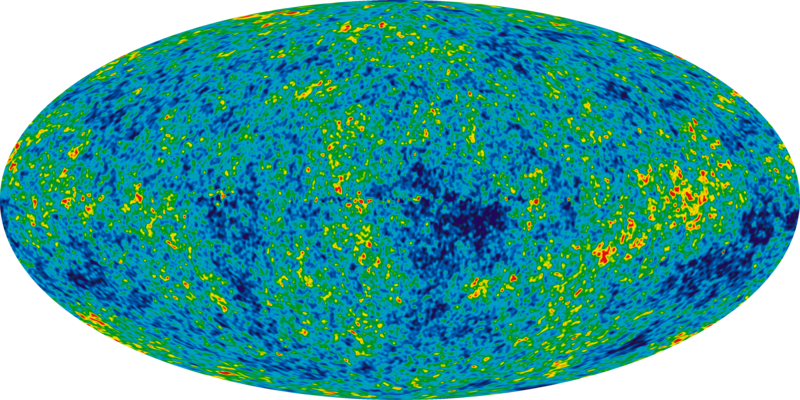

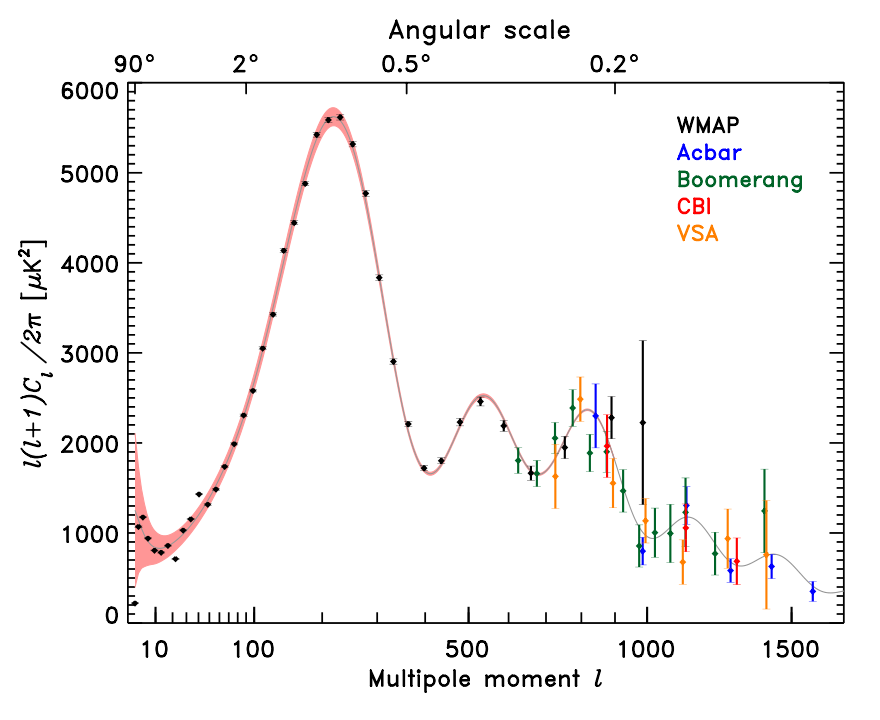

Astronomers often fit data with nonlinear functions derived from astrophysical theory that we believe apply to the observed situation. Among important recent applications of nonlinear regression are the fitting of the consensus Lambda-CDM model of cosmology to the fluctuations in the cosmic microwave background and the fitting of Keplerian exoplanetary orbits to stellar radial velocity time series.  

But astronomers also often fit data with heuristic nonlinear functions that do not have a clear astrophysical interpretation such as the stellar Initial Mass Function (several distributions used), galaxy luminosity function (Schechter function = gamma distribution), Navarro-Frenk-White Dark Matter profile, and various galaxy scaling relations.

Here we fit radial profiles from nearby Virgo Cluster elliptical galaxies to a heuristic nonlinear function proposed by Jose Luis Sersic in 1968. Here the surface brightness $B$ of an elliptical galaxy (or spiral galaxy bulge) as a function of radius $r$ follows: $B \propto -2.5*log(I_e * 10^{-(0.868*n-0.142)}((r/r_e)^{1/n}-1))$.  The data are obtained from [Kormendy et al. 2009](https://ui.adsabs.harvard.edu/abs/2009ApJS..182..216K/abstract). We fit using R's _nls_ (nonlinear least squares) function;  see also CRAN package _nmle_ for maximum likelihood fitting.

In [9]:
# Unpack galaxy profile data

data(ell_gal_profile)
summary(ell_gal_profile)
NGC4472 <- ell_gal_profile[ell_gal_profile[,1] == 'NGC.4472',2:3]
NGC4472
radius <- NGC4472[,1]
surf_mag <- NGC4472[,2]

NGC4472.fit <-  nls(surf_mag ~ -2.5*log10(I.e * 10^(-(0.868*n-0.142)*
   ((radius/r.e)^{1/n}-1))) + 26, data=list(NGC4472), start=list(I.e=20.,
   r.e=120.,n=4.), model=T, trace=T)
summary(NGC4472.fit)
logLik(NGC4472.fit)


      galaxy       radius           surf_mag    
 NGC.4406:52   Min.   :  1.384   Min.   :16.32  
 NGC.4472:58   1st Qu.:  7.737   1st Qu.:18.51  
 NGC.4551:40   Median : 24.203   Median :20.08  
               Mean   : 75.963   Mean   :20.46  
               3rd Qu.: 76.949   3rd Qu.:22.03  
               Max.   :877.001   Max.   :27.32  

,radius,surf_mag
,<dbl>,<dbl>
1,3.526,16.917
2,4.015,17.032
3,4.557,17.150
4,4.966,17.239
5,5.491,17.339
6,6.039,17.439
7,6.572,17.531
8,7.244,17.639
9,7.822,17.723


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


67.21708    (2.88e+01): par = (20 120 4)
3.648655    (6.76e+00): par = (19.00416 179.0912 5.211069)
3.016947    (6.13e+00): par = (11.14254 239.9565 5.833813)
0.08480303  (2.91e-01): par = (11.45163 265.4078 5.948181)
0.07817011  (2.08e-03): par = (11.40737 267.6302 5.952091)
0.07816977  (7.47e-08): par = (11.40733 267.6426 5.952099)



Formula: surf_mag ~ -2.5 * log10(I.e * 10^(-(0.868 * n - 0.142) * ((radius/r.e)^{
    1/n
} - 1))) + 26

Parameters:
     Estimate Std. Error t value Pr(>|t|)    
I.e  11.40733    0.57560   19.82   <2e-16 ***
r.e 267.64262    7.05769   37.92   <2e-16 ***
n     5.95210    0.09718   61.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0377 on 55 degrees of freedom

Number of iterations to convergence: 5 
Achieved convergence tolerance: 7.472e-08


'log Lik.' 109.3717 (df=4)

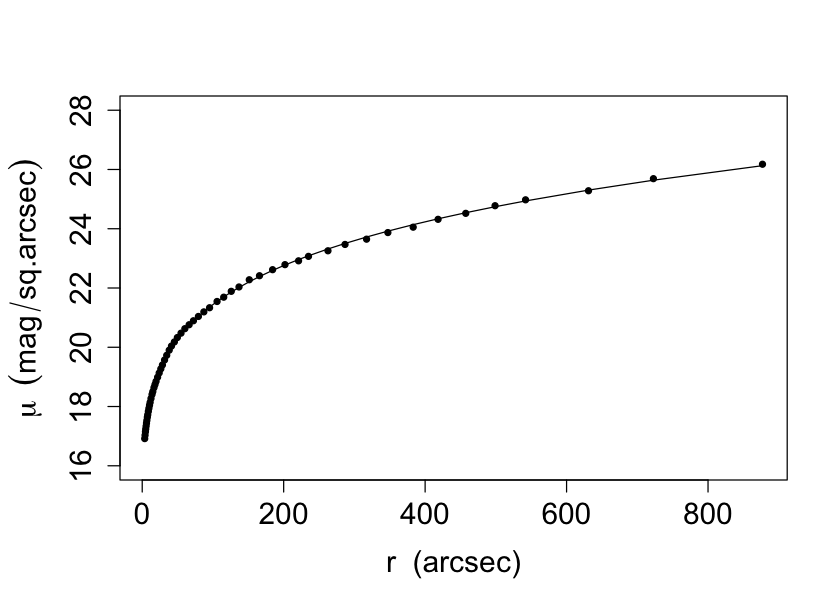

In [10]:
# Plot NGC 4472 data and best-fit model

par(mai=c(1,1,0.8,0.44))   # improve left-hand margin
plot(NGC4472.fit$model$radius, NGC4472.fit$model$surf_mag, pch=20, 
   xlab="r  (arcsec)", ylab=expression(mu ~~ (mag/sq.arcsec)), ylim=c(16,28), 
   cex.lab=1.5, cex.axis=1.5)
lines(NGC4472.fit$model$radius, fitted(NGC4472.fit))


We can examine various scalar quantities from the _nls_ fit, and plot the residuals between the data and model.  A nonparametric smoother is added to assist seeing the amazing structure in the residuals: periodic shells of stars in excess of the monotonic Sersic model.  This is a well-known effect due to past galaxy mergers that form large elliptical galaxies. A similar residual plot appears in Kormendy's paper. 

In [11]:
# Details information about the nls fit

formula(NGC4472.fit)    # formula used
coef(NGC4472.fit)       # best-fit parameters
vcov(NGC4472.fit)       # best-fit parameter covariance matrix
logLik(NGC4472.fit)     # log-likelihood of best fit

surf_mag ~ -2.5 * log10(I.e * 10^(-(0.868 * n - 0.142) * ((radius/r.e)^{
    1/n
} - 1))) + 26

I.e        r.e          n 
 11.407328 267.642617   5.952099

,I.e,r.e,n
I.e,0.33131606,-4.0282849,-0.052218025
r.e,-4.02828493,49.8110184,0.617916194
n,-0.05221802,0.6179162,0.009443238


'log Lik.' 109.3717 (df=4)

In [12]:
confint(NGC4472.fit)    # 95% confidence intervals
profile(NGC4472.fit)    # profiles (cuts) around the best fit (unfortunately the console output is verbose here)

Waiting for profiling to be done...



0.1258499   (7.76e-01): par = (267.6426 5.952099)
0.07855497  (5.02e-03): par = (271.3052 5.999577)
0.07855299  (1.60e-06): par = (271.3336 5.999636)
0.07978523  (3.04e-02): par = (275.005 6.04692)
0.07971132  (1.85e-05): par = (275.1635 6.048316)
0.07971132  (3.88e-08): par = (275.1635 6.048319)
0.08172463  (3.11e-02): par = (278.9516 6.096472)
0.08164548  (2.57e-05): par = (279.1183 6.097914)
0.08164548  (1.68e-08): par = (279.1183 6.09792)
0.08444048  (3.16e-02): par = (283.0287 6.146965)
0.08435610  (3.30e-05): par = (283.2036 6.148453)
0.08435610  (4.67e-08): par = (283.2036 6.148461)
0.08793387  (3.20e-02): par = (287.242 6.198422)
0.08784386  (4.02e-05): par = (287.4256 6.199958)
0.08784386  (1.13e-07): par = (287.4255 6.199968)
0.1234279   (7.56e-01): par = (267.6426 5.952099)
0.07854678  (4.86e-03): par = (264.0742 5.905842)
0.07854493  (1.58e-06): par = (264.1009 5.905899)
0.07972825  (2.86e-02): par = (260.5404 5.859453)
0.07966293  (1.50e-05): par = (260.6812 5.860736)
0.07

,2.5%,97.5%
I.e,10.27796,12.584321
r.e,254.29016,282.671404
n,5.76343,6.153343


0.1291123   (8.02e-01): par = (267.6426 5.952099)
0.07858126  (5.36e-03): par = (271.4285 6.001174)
0.07857900  (1.74e-06): par = (271.4588 6.001237)
0.07990066  (3.25e-02): par = (275.254 6.050106)
0.07981626  (2.06e-05): par = (275.4235 6.051598)
0.07981626  (2.78e-08): par = (275.4235 6.051602)
0.08197297  (3.33e-02): par = (279.3436 6.101398)
0.08188238  (2.85e-05): par = (279.5221 6.102941)
0.08188238  (4.73e-08): par = (279.5221 6.102948)
0.08487488  (3.38e-02): par = (283.5732 6.153699)
0.08477808  (3.65e-05): par = (283.7609 6.155293)
0.08477808  (5.36e-08): par = (283.7609 6.155302)
0.08860763  (3.42e-02): par = (287.9492 6.207033)
0.08850413  (4.44e-05): par = (288.1466 6.208681)
0.08850413  (9.05e-08): par = (288.1466 6.208692)
0.1264410   (7.81e-01): par = (267.6426 5.952099)
0.07857222  (5.19e-03): par = (263.9574 5.904327)
0.07857010  (1.74e-06): par = (263.9858 5.904388)
0.07983718  (3.05e-02): par = (260.309 5.856415)
0.07976288  (1.66e-05): par = (260.459 5.857782)
0.0

$I.e
          tau par.vals.I.e par.vals.r.e par.vals.n
1  -2.6965212     9.899142   288.146573   6.208692
2  -2.1562898    10.194122   283.760882   6.155302
3  -1.6162252    10.492653   279.522144   6.102948
4  -1.0763217    10.794685   275.423544   6.051602
5  -0.5365919    11.100163   271.458797   6.001237
6   0.0000000    11.407328   267.642617   5.952099
7   0.5307303    11.714493   263.985831   5.904388
8   1.0587307    12.023345   260.459077   5.857778
9   1.5868740    12.335497   257.037638   5.811991
10  2.1151421    12.650899   253.717292   5.767006
11  2.6435312    12.969511   250.493934   5.722806
12  3.1720376    13.291291   247.363668   5.679372

$r.e
          tau par.vals.I.e par.vals.r.e par.vals.n
1  -2.7446485    13.014510   249.725368   5.723444
2  -2.1943314    12.685915   253.098155   5.767481
3  -1.6437865    12.360312   256.577765   5.812423
4  -1.0930108    12.037760   260.169088   5.858292
5  -0.5421431    11.718401   263.876328   5.905100
6   0.0000000    11.

[1] 16.86510 16.99898 17.13236 17.22452 17.33398 17.43932 17.53439 17.64551
 [9] 17.73443 17.85340 17.95723 18.06537 18.16233 18.29338 18.43513 18.53503
[17] 18.67064 18.78159 18.88833 19.03543 19.17116 19.30246 19.42271 19.56787
[25] 19.70549 19.85083 19.97472 20.12042 20.26094 20.42064 20.57434 20.73244
[33] 20.88012 21.03817 21.19891 21.35521 21.54396 21.69890 21.86208 22.01814
[41] 22.20990 22.38611 22.59420 22.77541 22.95987 23.08640 23.31715 23.50340
[49] 23.72071 23.91930 24.13728 24.33573 24.54067 24.74241 24.93800 25.30389
[57] 25.63866 26.12891
attr(,"label")
[1] "Fitted values"

[1]  0.0519005757  0.0330187614  0.0176401898  0.0144771327  0.0050157365
 [6] -0.0003157904 -0.0033919188 -0.0065147815 -0.0114281968 -0.0174033440
[11] -0.0182264579 -0.0223743255 -0.0233337180 -0.0233817309 -0.0281333484
[16] -0.0300319554 -0.0326357509 -0.0395938112 -0.0403288944 -0.0464326754
[21] -0.0391629351 -0.0314616912 -0.0197080088  0.0031284333  0.0235093790
[26]  0.0501663654  0.0662769490  0.0585765146  0.0670572284  0.0553635565
[31]  0.0526636657  0.0275570285  0.0138839787  0.0018255315 -0.0049077495
[36] -0.0212055828  0.0010428395 -0.0089003672  0.0259173206  0.0168620506
[41]  0.0680953911  0.0278925277  0.0237954448  0.0125893886 -0.0428680306
[46] -0.0183992704 -0.0611482017 -0.0333979462 -0.0727126099 -0.0483045735
[51] -0.0842846068 -0.0177284412 -0.0206660216  0.0345892794  0.0380000986
[56] -0.0218910125  0.0513361751  0.0480920473
attr(,"label")
[1] "Residuals"

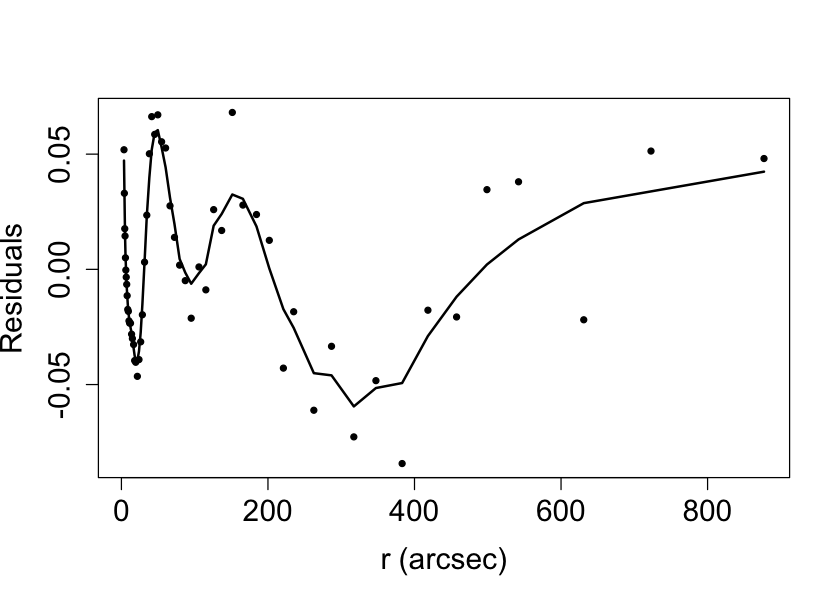

In [13]:
fitted(NGC4472.fit)     # fitted values
residuals(NGC4472.fit)  # residuals from the fitted values

# Residual plot

plot(NGC4472.fit$model$radius,residuals(NGC4472.fit), xlab="r (arcsec)", 
   ylab="Residuals", pch=20, cex.lab=1.5, cex.axis=1.5)
lines(supsmu(NGC4472.fit$model$radius, residuals(NGC4472.fit), span=0.05), 
   lwd=2)

We can perform more analysis of the residuals.  First, we show the residuals are normally distributed (Shapiro-Wilks test) but exhibit strong spatial autocorrelation (Durbin-Watson test). 


	Shapiro-Wilk normality test

data:  residuals(NGC4472.fit)/summary(NGC4472.fit)$sigma
W = 0.97433, p-value = 0.255


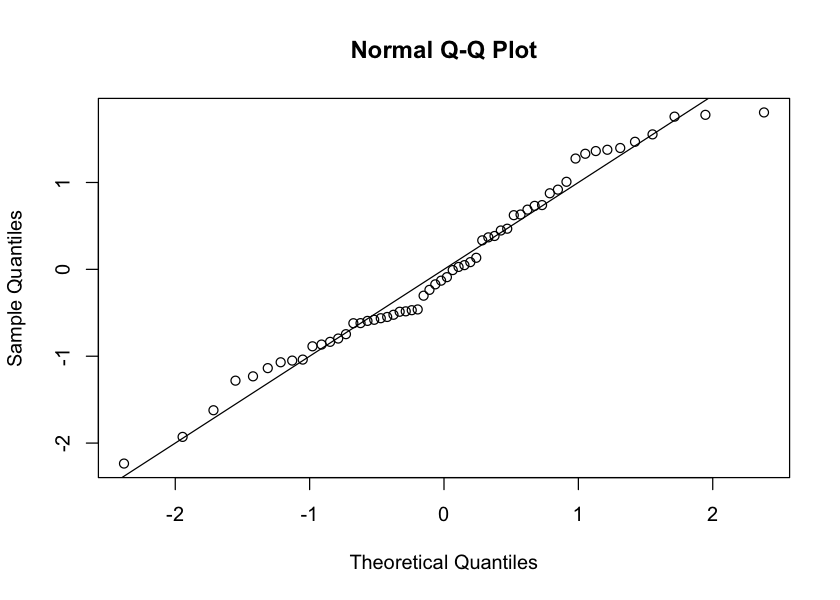

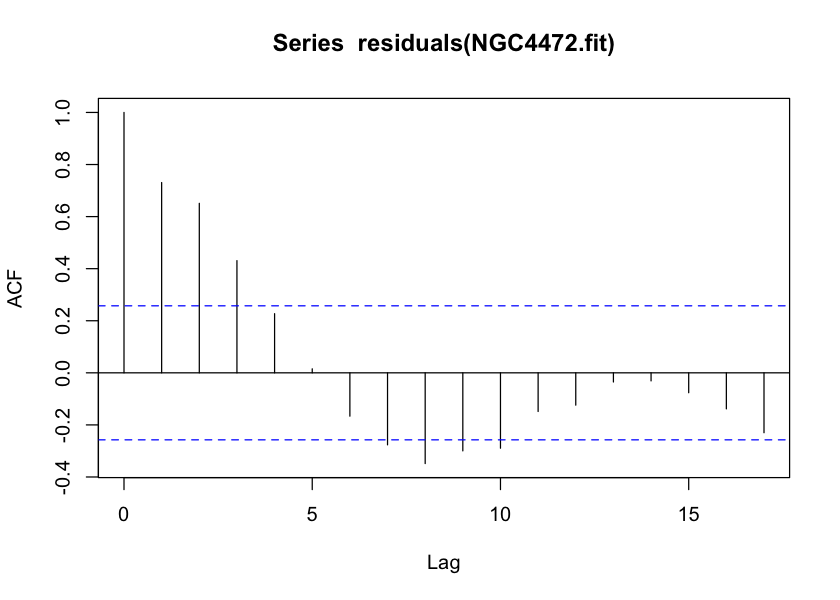

In [14]:
# Test for normality (OK) and autocorrelation (not OK) of residuals
# For linear models, also use the Durbin-Watson test in CRAN packages lmtest and car

qqnorm(residuals(NGC4472.fit) / summary(NGC4472.fit)$sigma) 
abline(a=0,b=1)
shapiro.test(residuals(NGC4472.fit) / summary(NGC4472.fit)$sigma) 
acf(residuals(NGC4472.fit))

There is an oddity: the error on Sersic's _n_ parameter from `nls` is much smaller than the error quoted by Kormendy.  Reading Kormendy's appendix, I find that he did not know how to evaluate the uncertainty of a nonlinear fit and chose an _ad hoc_ procedure that overestimated the error.  His estimate of _n_ was much more accurate than he thought.

> **Exercise:**  (a) Estimate parameter confidence intervals using bootstrap techniques using CRAN _nlstools_.  (b) See whether the best-fit model is significantly different using maximum likelihood estimation (CRAN package _nmle_) rather than Iteratively Weighted Least Squares (_nls_ in R). 

### Some useful books for regression

- S. Sheather, [_A Modern Approach to Regression with R_](https://link.springer.com/book/10.1007%2F978-0-387-09608-7), 2009, Springer
- J. Fox, [_An R Companion to Applied Regression_](https://socialsciences.mcmaster.ca/jfox/Books/Companion/), 3rd ed, 2019, Sage 
- C. Ritz & J. Streibig, [_Nonlinear Regression with R_](https://link.springer.com/book/10.1007/978-0-387-09616-2), 2008, Springer